### XGBM

### 1. Import Necessasry libraries

In [2]:
!pip install xgboost

In [4]:
import xgboost as xgb
import pandas as pd

### 2. Import Dataset

In [10]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
import seaborn as sns

In [14]:
X = breast_cancer_df.drop(['target'],axis=1)
y = breast_cancer_df[['target']]

In [15]:
X.shape,y.shape

((569, 30), (569, 1))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
train_x_y = xgb.DMatrix(data =  X_train,label = y_train)

In [19]:
parameters = {'max_depth':10, 
              'objective':'binary:logistic',
              'eval_metric':'auc',
              'learning_rate':.05,}

In [20]:
start_time = datetime.now()
xgb_classifier = xgb.train(params = parameters,dtrain =train_x_y )
end_time = datetime.now()

In [21]:
execution_time = end_time - start_time
print(execution_time)

0:00:00.231381


In [22]:
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xgb_classifier.predict(dtest) 
y_pred_xgb

array([0.6950028 , 0.30512938, 0.30512938, 0.6950028 , 0.6950028 ,
       0.30512938, 0.30512938, 0.42236546, 0.4434401 , 0.68501544,
       0.6873981 , 0.31491965, 0.6950028 , 0.37993956, 0.6950028 ,
       0.3209535 , 0.6950028 , 0.6950028 , 0.6950028 , 0.30512938,
       0.6950028 , 0.6950028 , 0.30512938, 0.6950028 , 0.6873981 ,
       0.6608546 , 0.6950028 , 0.6873981 , 0.6950028 , 0.30512938,
       0.6912981 , 0.6950028 , 0.5       , 0.6950028 , 0.6950028 ,
       0.6950028 , 0.43684837, 0.6950028 , 0.30512938, 0.6353723 ,
       0.6950028 , 0.30512938, 0.6950028 , 0.6950028 , 0.6124264 ,
       0.67040586, 0.67040586, 0.6873981 , 0.6950028 , 0.6950028 ,
       0.30512938, 0.30512938, 0.6747241 , 0.6124264 , 0.6950028 ,
       0.6950028 , 0.6950028 , 0.30512938, 0.31881908, 0.6950028 ,
       0.6950028 , 0.30512938, 0.30512938, 0.6873981 , 0.6950028 ,
       0.6873981 , 0.30512938, 0.33529702, 0.6950028 , 0.6950028 ,
       0.30815247, 0.30512938, 0.6950028 , 0.30512938, 0.68739

In [23]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0  

Accuracy with XGBoost=  0.956140350877193
AUC score with XGBoost is:  0.9553571428571429


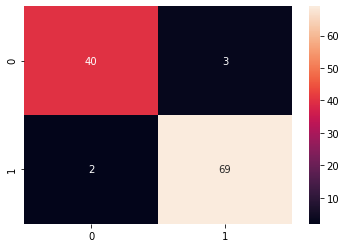

In [28]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

### Gradient Boosting Algorithm

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbclassifier = GradientBoostingClassifier()

In [30]:
start_time = datetime.now()
gbclassifier.fit(X_train,y_train)
end_time = datetime.now()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
execution_time = end_time - start_time
print(execution_time)

0:00:00.856398


In [32]:
y_pred = gbclassifier.predict(X_test)

Accuracy with GBBoost=  0.956140350877193
AUC score with GBBoost is:  0.9510317720275139


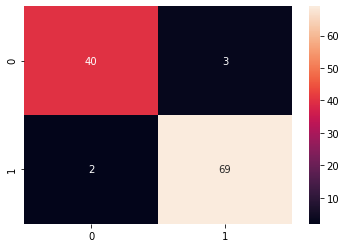

In [33]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with GBBoost= ", accuracy_score(y_test, y_pred))
print("AUC score with GBBoost is: ", roc_auc_score(y_test, y_pred))

### LightGBM

In [34]:
!pip install lightgbm

In [35]:
import lightgbm as lgbm

In [36]:
train_x_y = lgbm.Dataset(data = X_train,label=y_train)

In [37]:
lgbm_params = {'learning_rate':0.05, 
               'boosting_type':'gbdt',    #Try dart for better accuracy #gbdt
               'objective':'binary',
               'metric':['auc', 'binary_logloss'],
               'num_leaves':100,
               'max_depth':10}

In [41]:
start_time = datetime.now()
lgbm_classifier = lgbm.train(params = lgbm_params,train_set =train_x_y )
end_time = datetime.now()

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [42]:
execution_time = end_time - start_time
print(execution_time)

0:00:00.566483


In [43]:
y_pred_xgb = lgbm_classifier.predict(X_test) 
y_pred_xgb

array([0.99274648, 0.00451467, 0.00592367, 0.99658434, 0.99760231,
       0.00615337, 0.00427761, 0.14423357, 0.22984536, 0.99514301,
       0.98348306, 0.00951123, 0.99150976, 0.29823375, 0.99641238,
       0.00533853, 0.99616767, 0.99602359, 0.99729714, 0.00423913,
       0.98914918, 0.99628972, 0.00452958, 0.99690317, 0.99286195,
       0.99123209, 0.99728962, 0.98959959, 0.9972808 , 0.00435667,
       0.99685768, 0.99722306, 0.91123292, 0.996266  , 0.99724437,
       0.99580442, 0.26527905, 0.98413516, 0.00417974, 0.97364274,
       0.99706267, 0.00552888, 0.99708435, 0.99713541, 0.87735193,
       0.97681708, 0.99352599, 0.98922066, 0.9670648 , 0.99605004,
       0.00406788, 0.00420401, 0.94772571, 0.94950373, 0.99708921,
       0.99544207, 0.99767603, 0.0050305 , 0.03184587, 0.99703913,
       0.99713163, 0.00409061, 0.00572678, 0.96925992, 0.99720384,
       0.97399778, 0.0041059 , 0.00896107, 0.99588165, 0.9956316 ,
       0.00813073, 0.00415213, 0.99700818, 0.00469736, 0.99528

In [44]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0  

Accuracy with LGBM :  0.9649122807017544
AUC score with LGBM :  0.9672569328433009


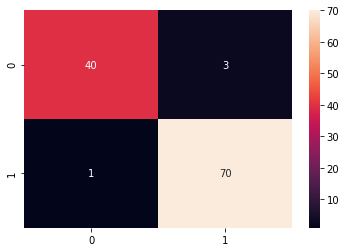

In [45]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with LGBM : ", accuracy_score(y_pred_xgb, y_test))
print("AUC score with LGBM : ", roc_auc_score(y_pred_xgb, y_test))